## Problems to Solve
##### 1. How do annual members and casual riders use Cyclistic bikes differently?
##### 2. Why would casual riders buy Cyclistic annual memberships?
##### 3. How can Cyclistic use digital media to influence casual riders to become members?

### About Data
The data has been provided to me by Cyclist Company through google data analytics by coursera for my capstone project. The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement) .It is a primary data so it can be trusted. The data is orginized in csv file of every month in each file. The data is not comprehensive as it has so many null values. while it has reliable, orignal and cited. While one might call it current ot not current, depends on analyst which year data is he chosen. In this case The data has been chosen from June-2021 to May-2022 so it's current becuase the latest data is chosen for analysis. The data has good integrity, it hasn't been Replicated much or transferred or manipluated. One might can object the completness, as there are many NaN in columns start_station_name, start_station_id, end_station_name and end_station_id. For my analysis the data is complete because I have to deal with membership. Member_casual column is full and doesn't have NaN values. I don't see any problem with this data.

## Jupyter Notebook

For this analysis I will use Jypyter Notebook. The data is became huge to handle after combining the data of previous twelve months. The python libraries are fast and easy to use.I won't use excel or SQL because python pandas have all fuction to deal with it. SQL is fast but importing all these files to MySQL will takes pretty much time. Upon asking for visualization I will use Tableau to make dashboard so that all figure can be seen by **Lily Moreno(manager), teammates and stakeholders** . If there are a presentaion I will use power point. **Report will be present at the bottom of notebook**

The following steps have been taken to clean, analyze and visualize data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Importing data

In [2]:

df1 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202106-divvy-tripdata.csv")
df2 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202107-divvy-tripdata.csv")
df3 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202108-divvy-tripdata.csv")
df4 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202109-divvy-tripdata.csv")
df5 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202110-divvy-tripdata.csv")
df6 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202111-divvy-tripdata.csv")
df7 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202112-divvy-tripdata.csv")
df8 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202201-divvy-tripdata.csv")
df9 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202202-divvy-tripdata.csv")
df10 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202203-divvy-tripdata.csv")
df11 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202204-divvy-tripdata.csv")
df12 = pd.read_csv(r"C:\Users\Ibad\Desktop\my_project\202205-divvy-tripdata.csv")

In [3]:
dataframe = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index = True)
dataframe.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member


##### NA values

In [4]:
dataframe.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    823167
start_station_id      823164
end_station_name      878338
end_station_id        878338
start_lat                  0
start_lng                  0
end_lat                 5036
end_lng                 5036
member_casual              0
dtype: int64

#### Dropping Columns
Drop `start_lat,start_lng,end_lat,end_lng` as all station are located in Chicago city.
Drop `start_station_id,start_station_name,end_station_name,end_station_id` contain too many null values.
Also dropped columns are not related to our analysis. We are looking for insights of member_ship.

In [5]:
df = dataframe.drop(['ride_id', 'start_station_id','start_station_name','end_station_name',
              'end_station_id','start_lat','start_lng','end_lat','end_lng', 'end_station_id'], axis = 1)
df.shape

(5860776, 4)

#### Check For Duplicates

In [6]:
duplicates = df[df.duplicated()]
duplicates

,rideable_type,started_at,ended_at,member_casual
59982,classic_bike,2021-06-20 20:07:31,2021-06-20 20:50:17,member
66068,classic_bike,2021-06-10 06:30:14,2021-06-10 06:36:19,member
92213,classic_bike,2021-06-16 18:50:41,2021-06-16 18:56:31,casual
99954,classic_bike,2021-06-14 21:55:03,2021-06-14 22:11:02,casual
100631,classic_bike,2021-06-22 11:08:20,2021-06-22 11:55:18,casual
...,...,...,...,...
5791599,electric_bike,2022-05-04 18:08:27,2022-05-04 18:31:19,member
5800205,electric_bike,2022-05-17 16:58:42,2022-05-17 17:08:20,member
5806677,electric_bike,2022-05-07 10:13:52,2022-05-07 10:18:35,member
5813354,electric_bike,2022-05-05 11:54:03,2022-05-05 11:56:54,member


There are 640 duplicated rows. lets keep *first row* from duplicate and remove other the duplicate.

In [7]:
data = df.drop_duplicates(keep = 'first')
data.shape

(5860136, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860136 entries, 0 to 5860775
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   rideable_type  object
 1   started_at     object
 2   ended_at       object
 3   member_casual  object
dtypes: object(4)
memory usage: 223.5+ MB


convert columns `ended_at,started_at` to type **datetime** from type **object**.

In [9]:
data[['started_at', 'ended_at']] = data[['started_at', 'ended_at']].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860136 entries, 0 to 5860775
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   rideable_type  object        
 1   started_at     datetime64[ns]
 2   ended_at       datetime64[ns]
 3   member_casual  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 223.5+ MB


###### adding new column
Let's add another column to see how much time each rider has spend riding.

In [10]:
data['ride_time'] = data['ended_at'] - data['started_at']
data.head(3)

,rideable_type,started_at,ended_at,member_casual,ride_time
0,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,member,0 days 00:02:43
1,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,member,0 days 00:06:17
2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,member,0 days 00:05:59


#### Sorting
sort values according to `ride_time`

In [11]:
data.ride_time.sort_values()

3800451   -1 days +23:01:58
3885821   -1 days +23:04:06
3869585   -1 days +23:05:55
4004550   -1 days +23:06:13
4026403   -1 days +23:06:31
                 ...       
546894     32 days 15:30:51
1369941    34 days 02:27:09
81713      36 days 14:21:23
545476     38 days 16:11:41
595683     38 days 20:24:09
Name: ride_time, Length: 5860136, dtype: timedelta64[ns]

#### Filtering
we see some `ride_time` has some negative value at top. And bottom has very large values.
I want to remove rows containing negative time in `ride_time` and time greater than 1 day.

In [12]:
outliners = data[(data.ride_time < pd.Timedelta(minutes = 0)) | (data.ride_time > pd.Timedelta(days = 1))]
print(outliners.shape)
outliners.head(3)

(4545, 5)


,rideable_type,started_at,ended_at,member_casual,ride_time
2920,classic_bike,2021-06-27 02:52:32,2021-06-28 03:52:27,casual,1 days 00:59:55
3740,classic_bike,2021-06-27 21:57:21,2021-06-28 22:57:17,casual,1 days 00:59:56
5542,classic_bike,2021-06-05 13:04:12,2021-06-06 14:04:01,casual,1 days 00:59:49


In [13]:
clean_df = data.drop(outliners.index)
print(clean_df.shape)
print(clean_df.isna().sum())

(5855591, 5)
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_time        0
dtype: int64


## Analyze
The data now is clean now. Time to analyze. Total number of member and casual rides.

In [15]:
print(clean_df.member_casual.count())
print(clean_df.member_casual.value_counts())

5855591
member    3299993
casual    2555598
Name: member_casual, dtype: int64


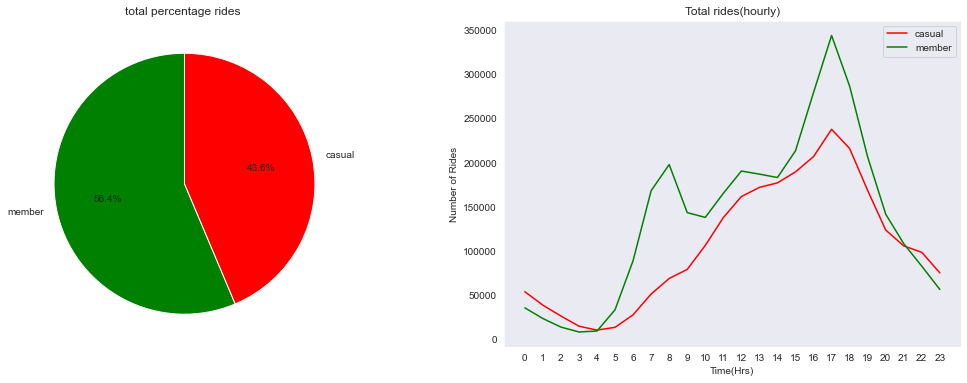

In [78]:

sns.set_style('dark')
fig = plt.figure(figsize = (18, 6))

plt.subplot(1,2,1)
plt.pie(clean_df.member_casual.value_counts(), labels = clean_df.member_casual.unique(),
       colors = ['green', 'red'], startangle = 90, autopct = '%2.1f%%')
plt.title('total percentage rides ');

plt.subplot(1,2,2)
#fig, ax = plt.subplots(figsize = (10, 7))
ct = pd.crosstab(clean_df.started_at.dt.hour,clean_df.member_casual)
plt.plot(ct.index, ct.casual, label='casual', color = 'red')
plt.plot(ct.index, ct.member, label='member', color = 'green')
plt.xlabel('Time(Hrs)')
plt.ylabel('Number of Rides')
plt.title('Total rides(hourly)')
plt.xticks(ct.index)
plt.legend();

The two lines are almost the same except at 7:00-8:00 and at 17:00. These are the office ON and OFF time.From graph we can conclude that people with job are most likely to buy membership. To make this statement more powerful we need more analysis. Let's check the number of rides on weekdays(sunday and sunday). For than we need to make another create another column for day of the week. In pandas library, by default week start from monday and assign it 0 through sunday and assign as 6.
we will comapare tatal rides for all day of week(**clean_df**), week days(**week_days**) and work days(**work_days**).

In [50]:
clean_df['day'] =  clean_df['started_at'].dt.dayofweek
clean_df

,rideable_type,started_at,ended_at,member_casual,ride_time,day
0,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,member,0 days 00:02:43,6
1,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,member,0 days 00:06:17,4
2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,member,0 days 00:05:59,4
3,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,member,0 days 00:25:50,3
4,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,member,0 days 00:04:08,4
...,...,...,...,...,...,...
5860771,electric_bike,2022-05-27 22:00:02,2022-05-27 22:07:01,member,0 days 00:06:59,4
5860772,electric_bike,2022-05-15 16:05:39,2022-05-15 16:44:12,member,0 days 00:38:33,6
5860773,electric_bike,2022-05-21 10:10:13,2022-05-21 10:26:09,casual,0 days 00:15:56,5
5860774,electric_bike,2022-05-12 07:53:58,2022-05-12 08:01:18,member,0 days 00:07:20,3


(1849895, 6)


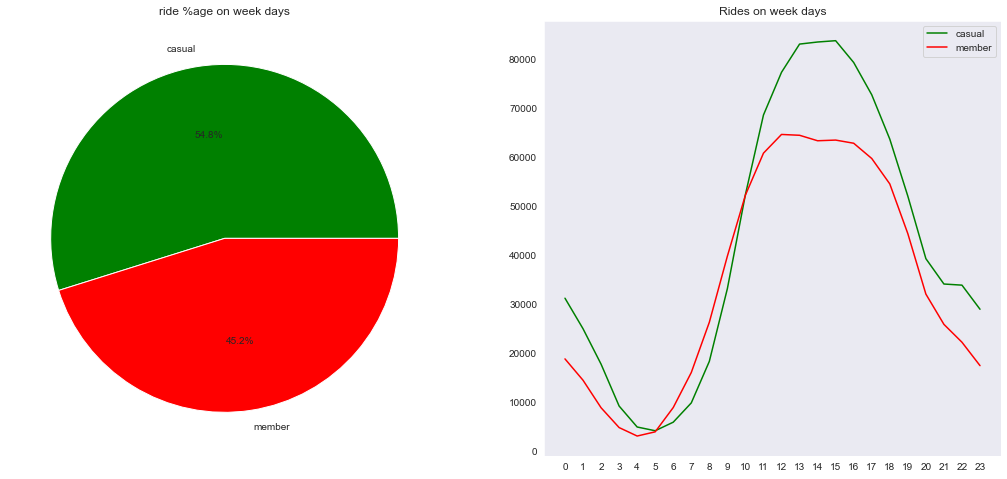

In [77]:

# visualization for week days

week_days = clean_df[(clean_df['day'] == 6) | (clean_df['day'] == 5)]

sns.set_style('dark')
plt.figure(figsize = (18,8))


plt.subplot(1,2,1)
plt.pie(week_days.member_casual.value_counts(), labels = ['casual','member'], colors = ['green', 'red'],
       autopct = '%2.1f%%')
plt.title('ride %age on week days');



plt.subplot(1,2,2)
week_ct = pd.crosstab(week_days.started_at.dt.hour, week_days.member_casual).reset_index()
plt.plot(week_ct.started_at, week_ct.casual, color = 'green', label = 'casual')
plt.plot(week_ct.started_at, week_ct.member, color = 'red', label = 'member')
plt.title("Rides on week days")
plt.xticks(week_ct.started_at)
plt.legend();


print(week_days.shape)



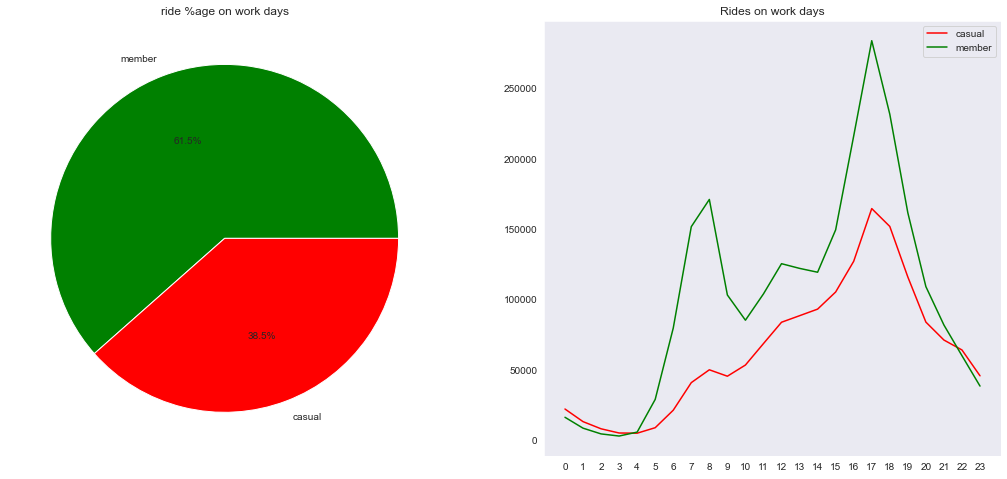

In [76]:

# visualization for work days

work_days = clean_df[(clean_df['day'] != 6) & (clean_df['day'] != 5)]


sns.set_style('dark')
plt.figure(figsize = (18,8))


plt.subplot(1,2,1)
plt.pie(work_days.member_casual.value_counts(), labels = ['member', 'casual'], colors = ['green', 'red'],
       autopct = '%2.1f%%')
plt.title('ride %age on work days');


plt.subplot(1,2,2)
work_ct = pd.crosstab(work_days.started_at.dt.hour, work_days.member_casual).reset_index()
plt.plot(work_ct.started_at, work_ct.casual, color = 'red', label = 'casual')
plt.plot(work_ct.started_at, work_ct.member, color = 'green', label = 'member')
plt.title("Rides on work days")
plt.xticks(work_ct.started_at)
plt.legend()




*From visuallization we can claerly see that than on work days number of riders with membership use it 61.5% and on week days this number is only 45.2%*

In [75]:
print(clean_df.groupby(['member_casual'])['ride_time'].mean().reset_index())
print(week_day.groupby(['member_casual'])['ride_time'].mean().reset_index())
print(work_days.groupby(['member_casual'])['ride_time'].mean().reset_index())


  member_casual                 ride_time
0        casual 0 days 00:25:29.685062361
1        member 0 days 00:12:48.242528393
  member_casual                 ride_time
0        casual 0 days 00:28:29.092822437
1        member 0 days 00:14:23.494619614
  member_casual                 ride_time
0        casual 0 days 00:23:31.590567402
1        member 0 days 00:12:15.953645917


As said above member riders only use it for office work. That's why their ride time is so short compare to casual riders. Both averages has been increased of casual and members rides on weekdays. One can predict that on weekdays riders use it for fun. While on work days it's been shorter.

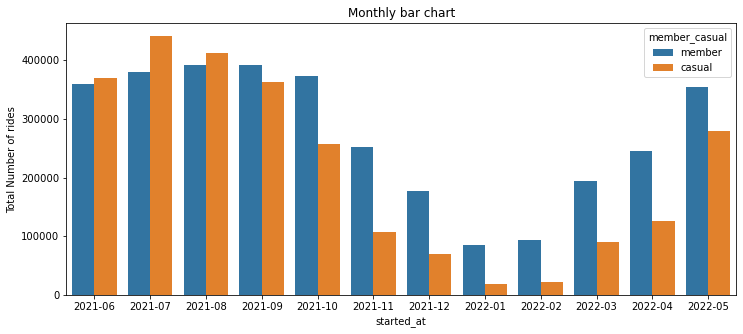

In [33]:
plt.figure(figsize = (12,5))
x = sns.countplot(clean_df.started_at.dt.to_period('M'), hue = clean_df.member_casual)
x.set_ylabel("Total Number of rides")
x.set_label('date(monthly)')
x.set(title = 'Monthly bar chart');

from above fig there is positive correlation between tempreture and rides. As tempreture rise the numbers of rides also increase.
##### prefer ride

now lets see which kind of ride_type prefers by members and casuals.

[Text(0.5, 1.0, 'Count of rideable_type')]

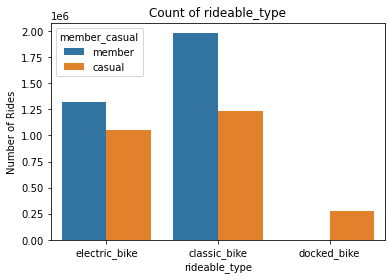

In [29]:
ax = sns.countplot(clean_df.rideable_type, hue = clean_df.member_casual)
ax.set_ylabel("Number of Rides")
ax.set(title = "Count of rideable_type");

members are interested in classic bikes the most. It's comfartable in riding and good for health. Office workers use it the most, they might prefer classic bikes for exercise.

# Report

There are two types of membership.

* ***member*** 
* ***casual***

Memership have advatnages for low prices, If someone is using  regularly then being member is economical compare to casual. The data was unbiased because it was collected from past few years. I used the latest data in this analysis. Upto 56% people are member on non-weekdays and on weekdays the casual rides increased to 54%. The insights I found are
* Members are riders with job from 9-5.
* Casual riders use it for exercise or fun.
* Members use it for tranportation from work to office.
* Number of riders (member and casual) decrease with decreas in tempreture.
* Members are not interested in docked bikes.




###### The casual riders needs to buy members because of the low prices throughout the year.



###### To use social media for influncing to convert casual rider to member rider.

* **Loaction based :** show an advertisment to people living in chicago city.

* **Job :** Target people with job from 9-5.
* **Age :** target people with age 25+ would be nice choice.
* **Ride Type :** show clssic type and then electric in advirtisment.

* **Advantages :** shows advantages of being membership.

* **Weather :** needs to promote advertisment in beginning and during summer season.